In [62]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [63]:
tf.config.experimental.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [64]:
# Constant to store the file path
FILE_PATH = "data/balance_sheets_quarterly_processed.csv"

# Read the data from the CSV file
df = pd.read_csv(FILE_PATH)

# Display the first few rows of the dataframe to verify the data
df.head()

,cashAndCashEquivalents,shortTermInvestments,inventory,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,longTermInvestments,otherNonCurrentAssets,totalNonCurrentAssets,totalAssets,...,retainedEarnings,accumulatedOtherComprehensiveIncomeLoss,othertotalStockholdersEquity,totalStockholdersEquity,minorityInterest,totalDebt,netDebt,marketCap,date,symbol
0,-0.114048,-0.032619,0.036330,0.017990,1.102536,-0.145809,-0.142090,0.054043,0.266859,0.036188,...,-0.156862,0.282182,-0.189427,0.286735,-0.078827,0.738202,1.194037,0.716875,2024-03-31,PKP.WA
1,-0.089977,-0.036077,0.042020,0.055177,1.089496,-0.145809,-0.141953,0.058469,0.260910,0.038259,...,-0.119268,0.292886,-0.189427,0.310695,-0.078827,0.737658,1.168615,0.820342,2023-12-31,PKP.WA
2,-0.094539,-0.038405,0.055151,0.056598,1.082825,-0.145809,-0.141404,0.058421,0.258594,0.037373,...,-0.112583,0.327413,-0.189427,0.325304,-0.078827,0.655730,1.053715,0.829998,2023-09-30,PKP.WA
3,-0.115019,-0.038405,0.051540,0.037615,1.065419,-0.145809,-0.141467,0.059340,0.252195,0.031956,...,-0.110100,0.332353,-0.189427,0.328230,-0.078827,0.654846,1.073378,0.998303,2023-06-30,PKP.WA
4,-0.087987,-0.038200,0.052689,0.079547,1.020788,-0.145809,-0.141298,0.059926,0.236580,0.030177,...,-0.074320,0.300516,-0.189427,0.337702,-0.078827,0.663487,1.058333,0.918979,2023-03-31,PKP.WA


In [65]:
df = df.drop(columns=["symbol", "date"])

In [66]:
X = df.drop(columns=["marketCap"])
y = df["marketCap"]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [68]:
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

In [69]:
model = models.Sequential([
    layers.Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(128, kernel_size=2, activation='relu'),
    layers.Conv1D(256, kernel_size=2, activation='relu'),  # Added another Conv layer
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # Increased number of neurons
    layers.Dense(1)
])

model.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=["mae"],
)

model.summary()

/home/mateu/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_17 (Conv1D)              │ (None, 22, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_18 (Conv1D)              │ (None, 10, 128)        │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_19 (Conv1D)              │ (None, 9, 256)         │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_15 (MaxPooling1D) │ (None, 4, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,825 (835.25 KB)

 Trainable params: 213,825 (835.25 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=20,
    restore_best_weights=True,  # Restores the weights from the epoch with the best validation loss
)

history = model.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
)

test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}, Test MAE: {test_mae}")

Epoch 1/200
423/423 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.7690 - mae: 0.1820 - val_loss: 0.5244 - val_mae: 0.1638
Epoch 2/200
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3351 - mae: 0.1432 - val_loss: 0.3772 - val_mae: 0.1400
Epoch 3/200
423/423 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2862 - mae: 0.1287 - val_loss: 0.4533 - val_mae: 0.1722
Epoch 4/200
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2684 - mae: 0.1131 - val_loss: 0.3042 - val_mae: 0.1687
Epoch 5/200
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2199 - mae: 0.1151 - val_loss: 0.2591 - val_mae: 0.1425
Epoch 6/200
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2102 - mae: 0.1074 - val_loss: 0.2497 - val_mae: 0.1018
Epoch 7/200
423/423 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2313 - mae: 0.1128 - val_loss: 0.3059 - val_mae: 0.1350
Epoch 8/200
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2085 - mae: 0.1073 - val_loss: 0.2586 - val_mae: 0.1097
Epoch 9/200
423/423 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

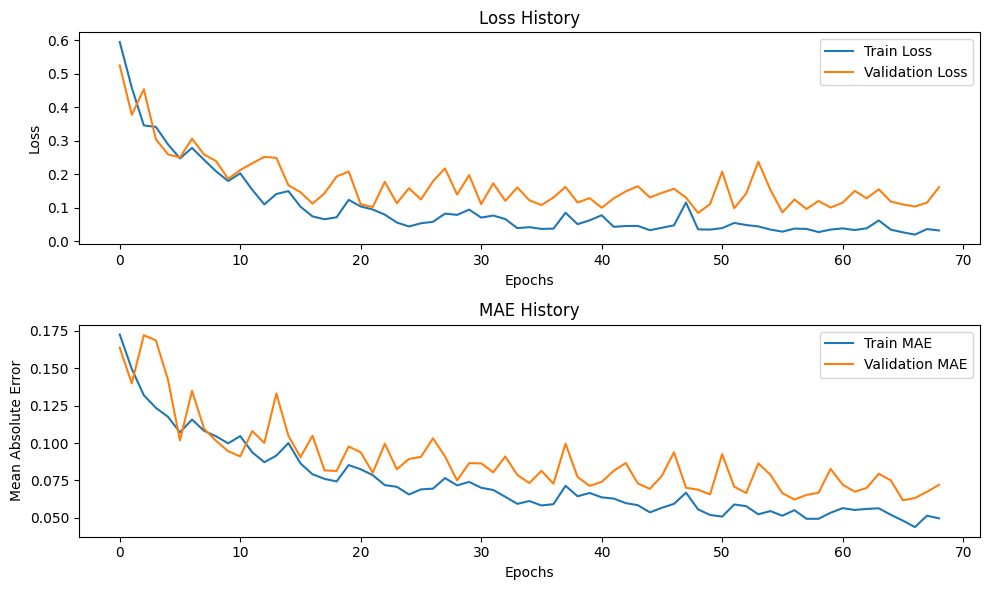

In [71]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss History")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history["mae"], label="Train MAE")
plt.plot(history.history["val_mae"], label="Validation MAE")
plt.title("MAE History")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.legend()

plt.tight_layout()
plt.show()